# Dataset

In [1]:
import numpy as np
import segmentation_models_pytorch as smp
import torch
from torch.utils.data import DataLoader, Subset
from dataset import HSIDataset
from torchvision.transforms import v2

path = '../../home/ivan/HELICoiD/HSI_Human_Brain_Database_IEEE_Access/'

dataset = HSIDataset(path)
dataset.normalize_dataset()

# Segmentation Model Split
# train_indices = list(range(0, 19))
# val_indices = list(range(19, 24))
# test_indices = list(range(24, 36))

# Autoencoder Split
train_indices = list(range(0, 33))
val_indices = list(range(33, 35))
test_indices = list(range(35, 36))

trainset = Subset(dataset, train_indices)
valset = Subset(dataset, val_indices)
testset = Subset(dataset, test_indices)

trainloader = DataLoader(trainset, batch_size=2, shuffle=True)
validationloader = DataLoader(valset, batch_size=2, shuffle=False)
testloader = DataLoader(testset, batch_size=2, shuffle=False)

/home/tim_ivan/idp/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Windowing

[412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429
 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447
 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465
 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483
 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501
 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519
 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537
 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555
 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573
 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591
 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609
 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627
 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645
 646 647 648 649 650 651 652 653 654 655 656 657 65

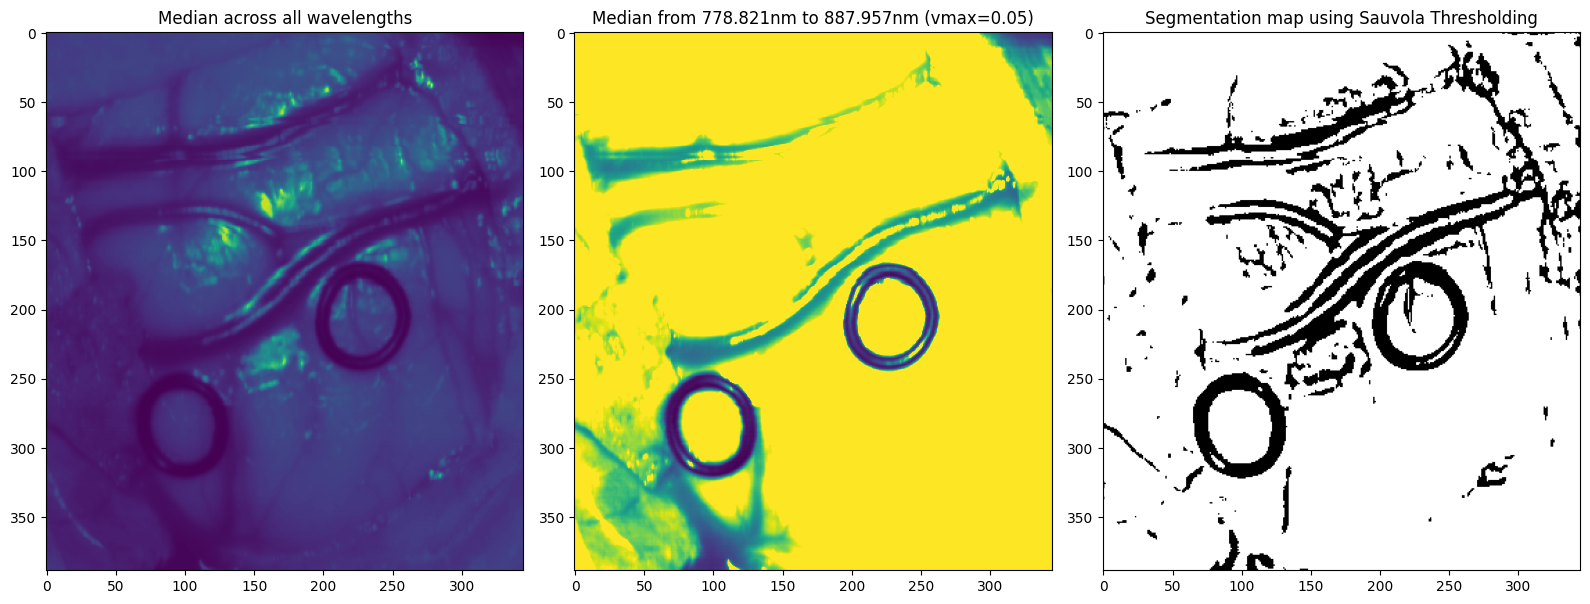

In [5]:
#patient = "012-02"
#patient = "025-02"
#patient = "015-01"
# patient = "012-01"
#patient = "016-04"
#patient = "008-01"
# patient = "020-01"
patient = "004-02"
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pickle
import glob
import pickle
from scipy.linalg import pinv
import time
from tqdm import tqdm
from skimage import filters, color, io
from matplotlib.ticker import LinearLocator
import skimage

import pickle
import matplotlib.pyplot as plt
import random
from matplotlib.colors import Normalize
from PIL import Image
from spectral import open_image
import matplotlib.cm as cm


# left=140
# right=280
#left=200
#right=201
left=520
right=670


hdr_path = path+"/{}/raw.hdr".format(patient)
img = open_image(hdr_path)
wavelength = np.array(img.metadata['wavelength']).astype(float)
print(wavelength[left])
print(wavelength[right])
# print(np.where((wavelength >= 700) & (wavelength <= 900))[0])

white_path = path+"/{}/whiteReference.hdr".format(patient)
white = open_image(white_path)
white = white.load()

dark_path = path+"/{}/darkReference.hdr".format(patient)

dark = open_image(dark_path)
dark = dark.load()

white_full = np.tile(white, (img.shape[0],1,1))
dark_full = np.tile(dark, (img.shape[0],1,1))

img_normalized = ((img.load() - dark_full) / (white_full - dark_full))
#img_normalized = ((img.load() - dark_full) / (white_full - dark_full))+0.1
img_normalized[img_normalized <= 0] = 10**-2

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))
axs[0].imshow(np.median(img_normalized,axis=2))
axs[0].set_title("Median across all wavelengths")
median_hb = (np.median(img_normalized[:,:,left:right],axis=2))
median_hb_normalized = (median_hb - np.min(median_hb))/(np.max(median_hb) - np.min(median_hb))
plt2 = axs[1].imshow(median_hb_normalized, vmax=0.05)
axs[1].set_title("Median from " + str(wavelength[left]) + "nm to " + str(wavelength[right]) + "nm (vmax=0.05)")
axs[2].imshow((median_hb_normalized > filters.threshold_sauvola(median_hb_normalized)), cmap='gray')
axs[2].set_title("Segmentation map using Sauvola Thresholding")
plt.tight_layout()
#plt.savefig(plot_dir + "segm")
#plt3 = axs[2].imshow((median_hb < 0.3)*median_hb)

# Visualize Data

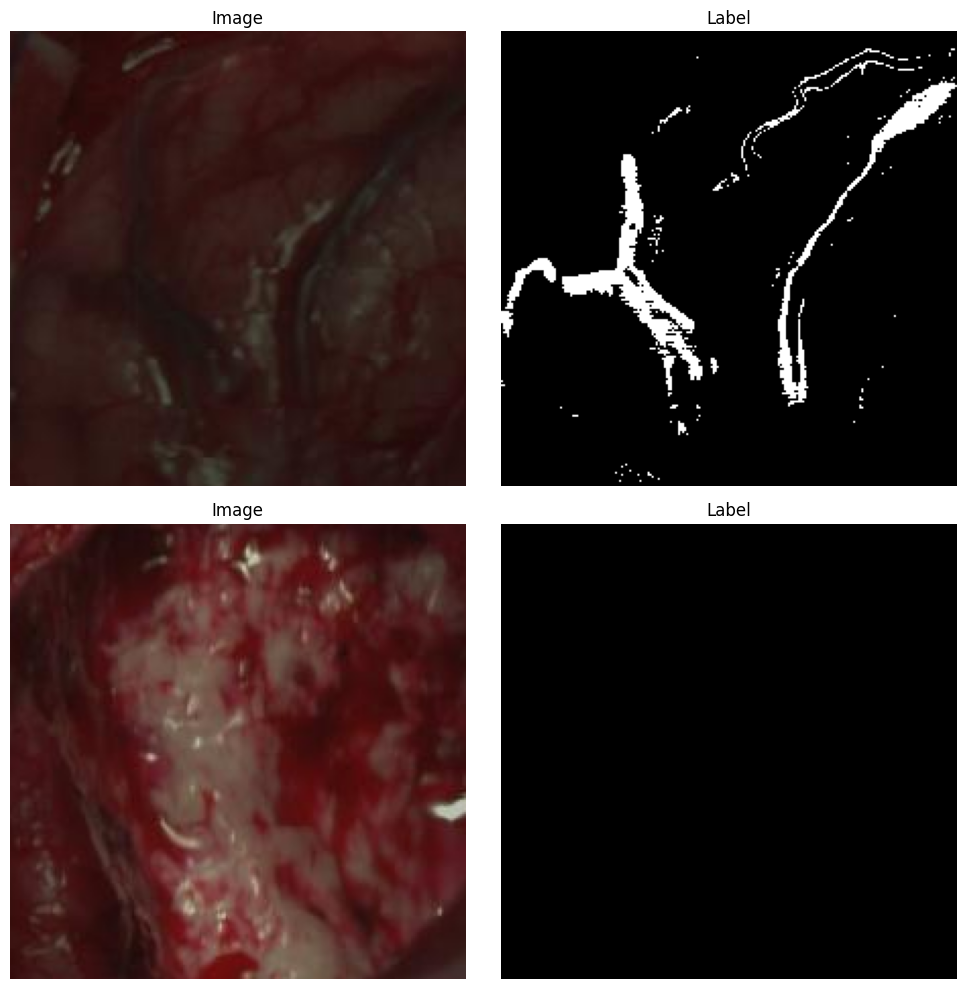

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def show_labels(labels):
    plt.imshow(labels.squeeze().numpy(), cmap='gray')
    plt.show()

def create_montage(dataset, num_images=10):
    # Define the number of images you want to show in the montage
    num_images = min(num_images, len(dataset))

    fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 5))
    
    for i in range(num_images):
        sample = dataset[i]
        image, label = sample[2], sample[1]
        
        # Convert image and label to numpy arrays for plotting
        if isinstance(image, torch.Tensor):
            image = image.numpy().transpose(1, 2, 0)
        if isinstance(label, torch.Tensor):
            label = label.numpy().squeeze()
            overlay = np.zeros_like(image)
            overlay[label == 1] = [0, 255, 0]
        
        # Plot the image
        axes[i, 0].imshow(image)
        axes[i, 0].axis('off')
        axes[i, 0].set_title('Image')
        
        # Plot the label
        axes[i, 1].imshow(label, cmap='gray')
        axes[i, 1].axis('off')
        axes[i, 1].set_title('Label')
    
    plt.tight_layout()
    plt.show()

create_montage(valset, num_images=2)

# Model Initialization

In [ ]:
import segmentation_models_pytorch as smp
import torch.nn as nn
from segmentation_util import model_pipeline
import torch.nn.functional as F
from HSI_Net import HyperspectralToGrayscale, CombinedModel, ConvolutionalReducer, Unet

config = {
    'model': 'Test-model',
    'learning_rate': 0.001,
    'epochs': 10,
    'batch_size': 1,
    'optimizer': 'Adam',
    'criterion': 'BCELoss',
}

segmenter = smp.Unet('resnet34', in_channels=1, classes=1)
segmenter.load_state_dict(torch.load('./models/Unet-resnet34-DiceLoss/Unet-resnet34-DiceLoss_epoch10.pth'))
encoder = HyperspectralToGrayscale()
model = CombinedModel(encoder, segmenter)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=config['learning_rate'])
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

# Training

In [ ]:
import matplotlib.pyplot as plt
from segmentation_util import model_pipeline


model, train_losses, val_losses = model_pipeline(model, trainloader=trainloader, 
                                                 validationloader=validationloader, 
                                                 testloader=testloader, criterion=criterion, 
                                                 optimizer=optimizer,project='hsi-segmentation',
                                                 model_name=config['model'],
                                                 device=device, config=config, 
                                                 batch_print=1)

# Plotting the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

In [ ]:
import torch
from HSI_Net import CombinedModel, HyperspectralToGrayscale, ConvolutionalReducer
from segmentation_util import predict, show_overlay
import segmentation_models_pytorch as smp
import cv2
import numpy as np
import matplotlib.pyplot as plt

encoder = HyperspectralToGrayscale()
segmenter = smp.Unet('resnet34', in_channels=1, classes=1)
# segmenter.load_state_dict(torch.load('./models/Unet-resnet34-DiceLoss/Unet-resnet34-DiceLoss_epoch10.pth'))
model = CombinedModel(encoder, segmenter)
model.load_state_dict(torch.load('./models/ConvLayer-Unet-resnet34/ConvLayer-Unet-resnet34_epoch10.pth'))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

show_overlay(model, testset[0], device)

# Autoencoder Approach:
## Standard Autoencoder

In [4]:
from autoencoder import model_pipeline_autoencoder, Autoencoder
import torch.nn as nn
from torchsummary import summary

config = {
    'model': 'autoencoder-single-channel-with-normalized-cropped-data-deeper',
    'learning_rate': 0.001,
    'epochs': 10,
    'batch_size': trainloader.batch_size,
    'optimizer': 'Adam',
    'criterion': 'MSELoss',
}

autoencoder = Autoencoder(output_channels=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=config['learning_rate'])
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

autoencoder, train_losses, val_losses = model_pipeline_autoencoder(autoencoder,
                                                trainloader=trainloader, 
                                                validationloader=validationloader, 
                                                criterion=criterion, 
                                                optimizer=optimizer,
                                                project='hsi-autoencoder',
                                                model_name=config['model'],
                                                device=device, 
                                                config=config, 
                                                batch_print=1)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: tim-mach (idp2024). Use `wandb login --relogin` to force relogin


/home/tim_ivan/idp/.venv/lib/python3.8/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


Epoch 1, Batch 1, Loss: 0.3890
Epoch 1, Batch 2, Loss: 2.7571
Epoch 1, Batch 3, Loss: 0.5939
Epoch 1, Batch 4, Loss: 0.2385
Epoch 1, Batch 5, Loss: 0.7334
Epoch 1, Batch 6, Loss: 0.4101
Epoch 1, Batch 7, Loss: 0.6244
Epoch 1, Batch 8, Loss: 0.3501
Epoch 1, Batch 9, Loss: 0.3059
Epoch 1, Batch 10, Loss: 3.3640


/home/tim_ivan/idp/.venv/lib/python3.8/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


Epoch 1, Batch 11, Loss: 1.9338
Epoch 1, Batch 12, Loss: 0.5100
Epoch 1, Batch 13, Loss: 0.2868
Epoch 1, Batch 14, Loss: 0.3278
Epoch 1, Batch 15, Loss: 0.5006
Epoch 1, Batch 16, Loss: 0.3403
Epoch 1, Batch 17, Loss: 1.4230
Epoch 1, Train Loss: 0.8876
Epoch 1, Validation Loss: 0.2070
Epoch 2, Batch 1, Loss: 0.5104
Epoch 2, Batch 2, Loss: 0.6933
Epoch 2, Batch 3, Loss: 0.2842
Epoch 2, Batch 4, Loss: 0.2559
Epoch 2, Batch 5, Loss: 0.2619
Epoch 2, Batch 6, Loss: 0.4420
Epoch 2, Batch 7, Loss: 0.2559
Epoch 2, Batch 8, Loss: 0.1276
Epoch 2, Batch 9, Loss: 0.1505
Epoch 2, Batch 10, Loss: 0.2645
Epoch 2, Batch 11, Loss: 0.1365
Epoch 2, Batch 12, Loss: 0.3447
Epoch 2, Batch 13, Loss: 0.0939
Epoch 2, Batch 14, Loss: 0.0811
Epoch 2, Batch 15, Loss: 0.0868
Epoch 2, Batch 16, Loss: 0.1241
Epoch 2, Batch 17, Loss: 0.0571
Epoch 2, Train Loss: 0.2453
Epoch 2, Validation Loss: 0.1940
Epoch 3, Batch 1, Loss: 0.1601
Epoch 3, Batch 2, Loss: 0.0820
Epoch 3, Batch 3, Loss: 0.0716
Epoch 3, Batch 4, Loss: 0.

epoch,▁▂▃▃▄▅▆▆▇█
train/loss,█▃▁▁▁▁▁▁▁▁
validation/loss,█▇▃▃▃▁▁▂▁▆
epoch,10
train/loss,0.05774
validation/loss,0.14769


## Variational Autoencoder

In [ ]:
from autoencoder import model_pipeline_variational_autoencoder, VariationalAutoencoder
from torchsummary import summary

config = {
    'model': 'variational-autoencoder',
    'learning_rate': 0.001,
    'epochs': 10,
    'batch_size': trainloader.batch_size,
    'optimizer': 'Adam',
    'criterion': 'vae_loss',
}

vae = VariationalAutoencoder()
optimizer = torch.optim.Adam(vae.parameters(), lr=config['learning_rate'])
device = torch.device('cuda:6' if torch.cuda.is_available() else 'cpu')

vae, train_losses, val_losses = model_pipeline_variational_autoencoder(vae,
                                                trainloader=trainloader, 
                                                validationloader=validationloader, 
                                                optimizer=optimizer,
                                                project='hsi-autoencoder',
                                                model_name=config['model'],
                                                device=device, 
                                                config=config, 
                                                batch_print=1)

# Ensemble Model Approach:

/home/tim_ivan/idp/.venv/lib/python3.8/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


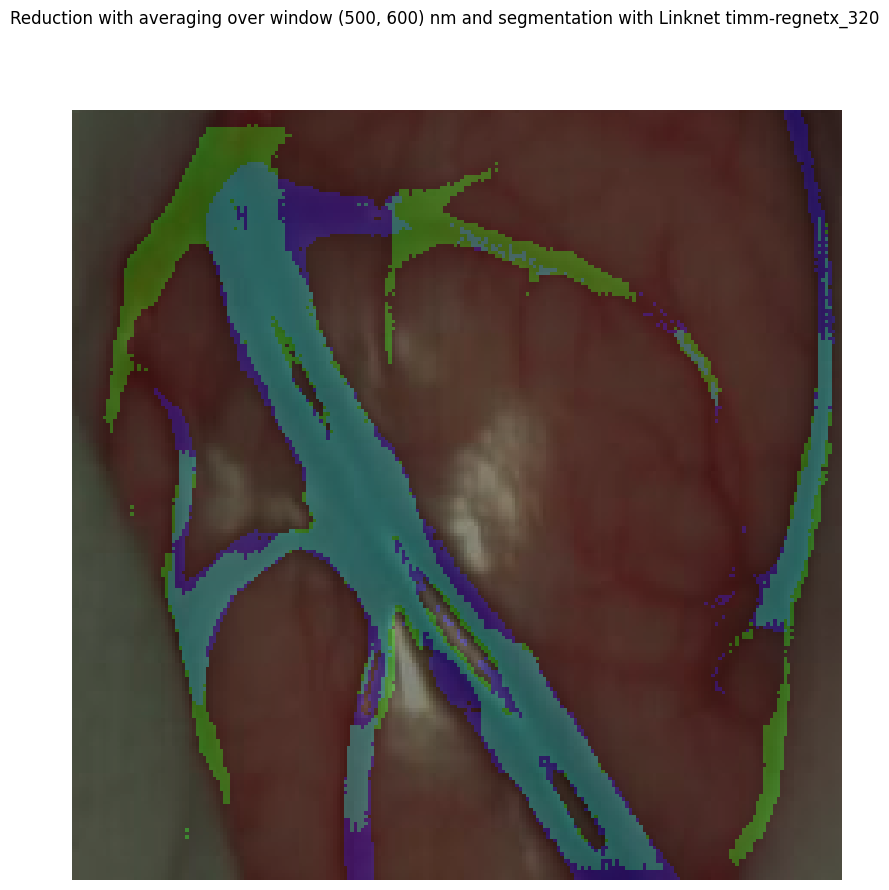

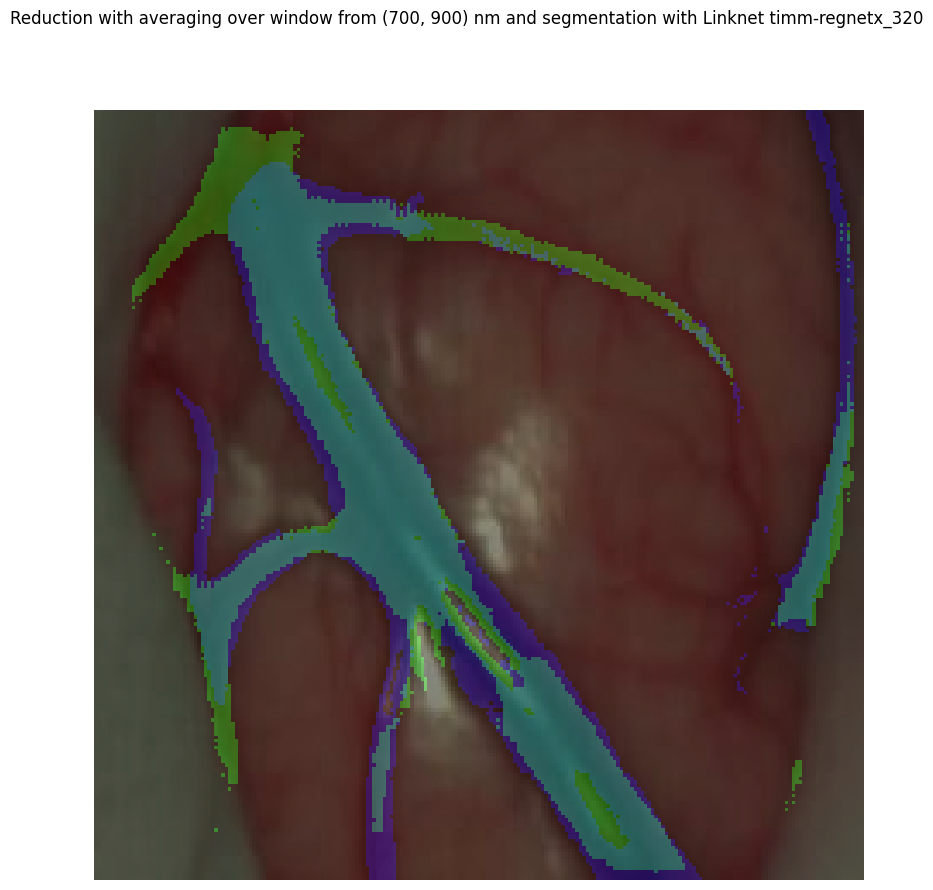

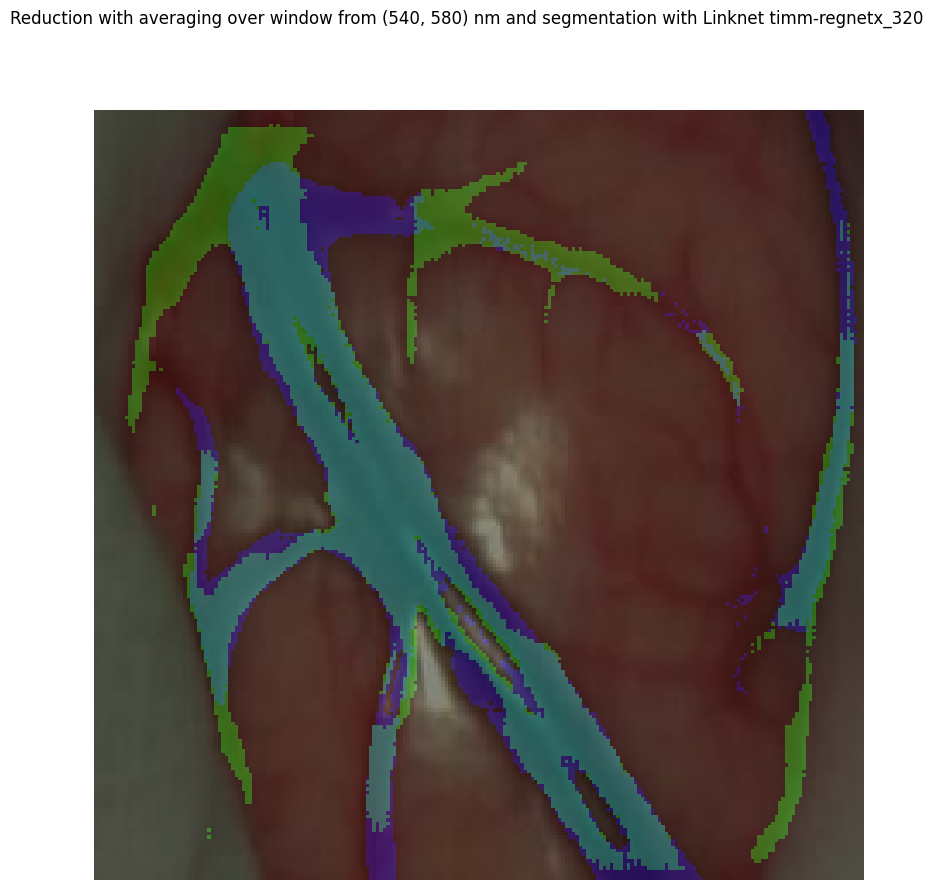

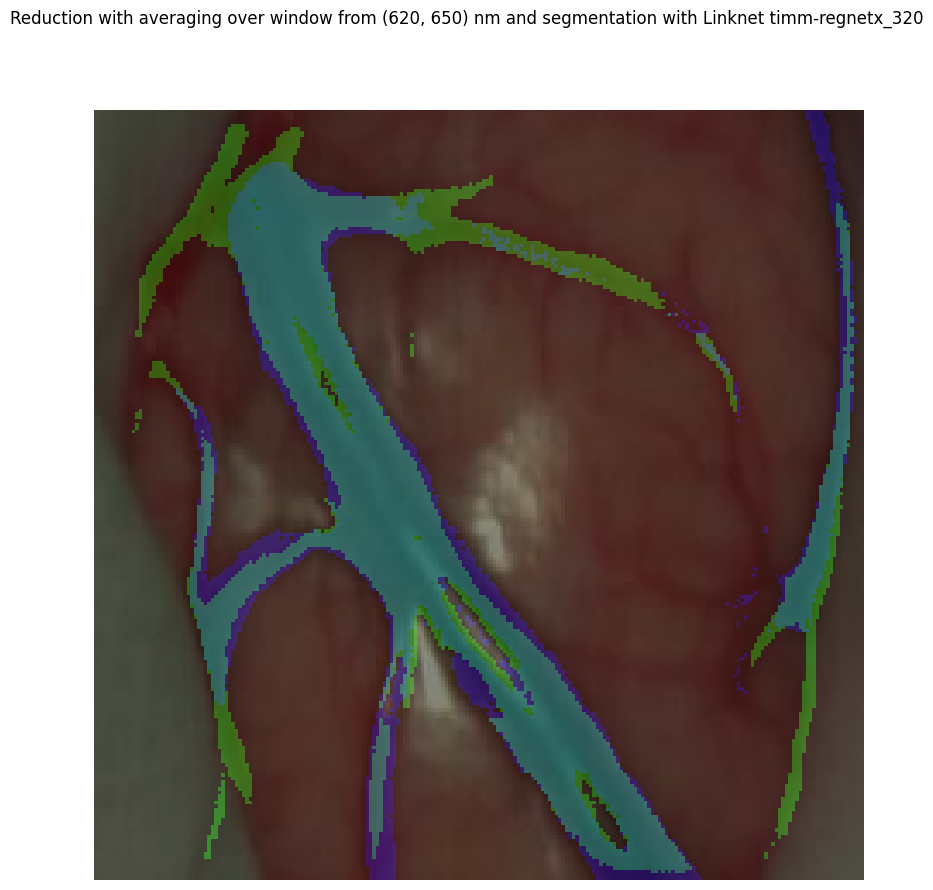

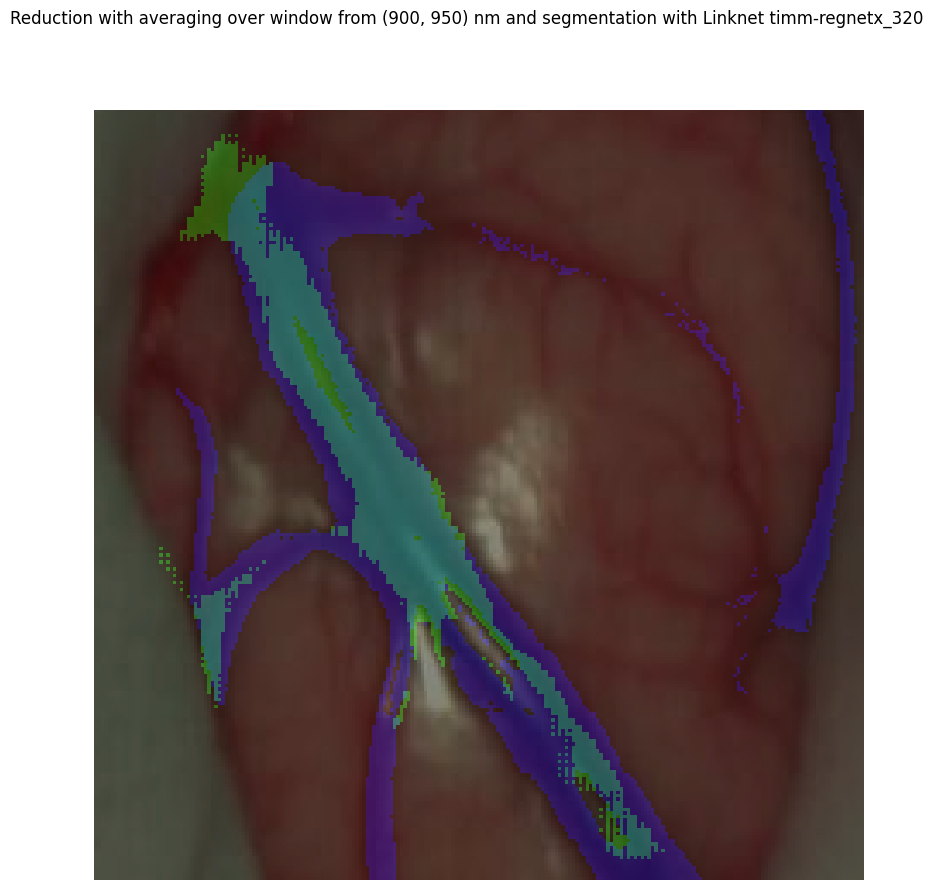

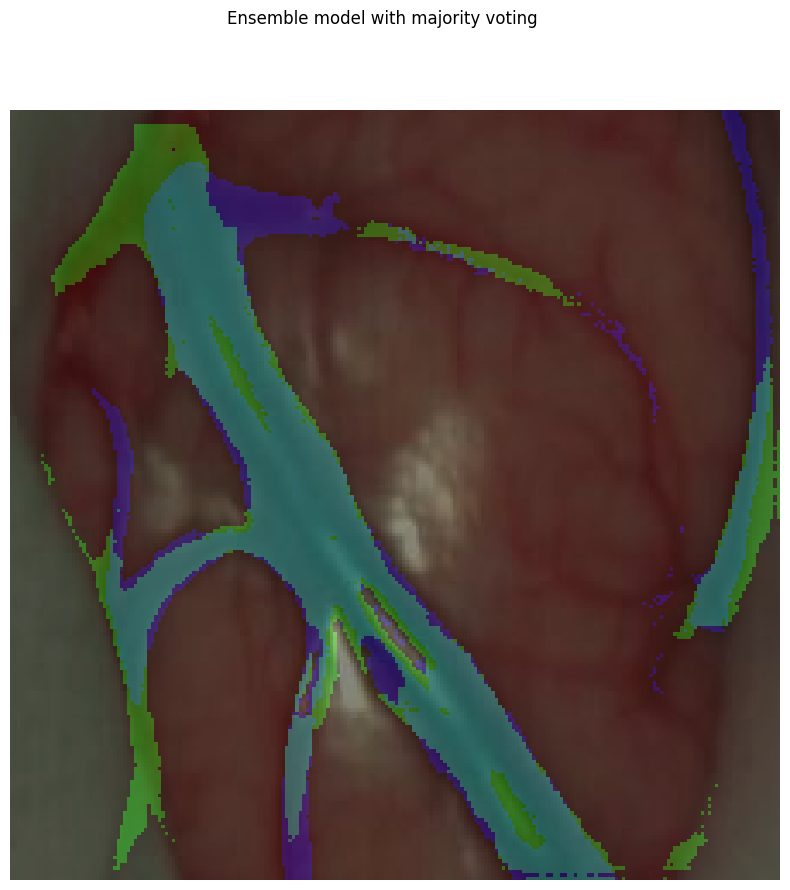

In [22]:
from HSI_Net import CombinedModel, SegmentationModelWithWindowing
from segmentation_util import predict, show_overlay, build_segmentation_model
from autoencoder import Autoencoder, DeeperAutoencoder
from ensemble_model import EnsembleModelMajorityVoting, EnsembleModelAverage, EnsembleModelAbsoluteVoting
import segmentation_models_pytorch as smp



device = ('cuda:1' if torch.cuda.is_available() else 'cpu')
# autoencoder_single_channel = Autoencoder(output_channels=1)
# autoencoder_single_channel.load_state_dict(torch.load('./models/autoencoder-single-channel-with-normalized-cropped-data.pth'))
# autoencoder_single_channel.to(device)
# autoencoder_single_channel.eval()
encoder = 'timm-regnetx_320'
architecture = 'Linknet'

segmenter_single_channel = build_segmentation_model(encoder, architecture, device)
segmenter_single_channel.load_state_dict(torch.load('./models/{architecture}-{encoder}-512x512-augmented-with-random-crops-single-channel.pth'.format(architecture=architecture, encoder=encoder)))
segmenter_single_channel.eval()

window1 = (700, 900)
model_windowing_700to900 = SegmentationModelWithWindowing(segmenter_single_channel, window=dataset.get_window_from_wavelengths(window1))
data = testset[0]



window2 = (500, 600)
# segmenter_windowed = smp.UnetPlusPlus('resnext101_32x8d', in_channels=1, classes=1)
# segmenter_windowed.load_state_dict(torch.load('./models/UnetPlusPlus-resnext101_32x8d-512x512-augmented-with-random-crops-single-channel.pth'))
# segmenter_windowed.to(device)

model_with_windowing_500to600 = SegmentationModelWithWindowing(segmenter_single_channel, window=dataset.get_window_from_wavelengths(window2))

window3 = (540, 580)
window4 = (620, 650)
window5 = (900, 950)

model_windowing_540to580 = SegmentationModelWithWindowing(segmenter_single_channel, window=dataset.get_window_from_wavelengths(window3))
model_windowing_620to650 = SegmentationModelWithWindowing(segmenter_single_channel, window=dataset.get_window_from_wavelengths(window4))
model_windowing_900to1000 = SegmentationModelWithWindowing(segmenter_single_channel, window=dataset.get_window_from_wavelengths(window5))

show_overlay(model_with_windowing_500to600, data, device, title='Reduction with averaging over window {window2} nm and segmentation with {architecture} {encoder}'.format(window2=window2, architecture=architecture, encoder=encoder))
show_overlay(model_windowing_700to900, data, device, title='Reduction with averaging over window from {window1} nm and segmentation with {architecture} {encoder}'.format(window1=window1, architecture=architecture, encoder=encoder))
show_overlay(model_windowing_540to580, data, device, title='Reduction with averaging over window from {window3} nm and segmentation with {architecture} {encoder}'.format(window3=window3, architecture=architecture, encoder=encoder))
show_overlay(model_windowing_620to650, data, device, title='Reduction with averaging over window from {window4} nm and segmentation with {architecture} {encoder}'.format(window4=window4, architecture=architecture, encoder=encoder))
show_overlay(model_windowing_900to1000, data, device, title='Reduction with averaging over window from {window5} nm and segmentation with {architecture} {encoder}'.format(window5=window5, architecture=architecture, encoder=encoder))


model = EnsembleModelAbsoluteVoting([model_with_windowing_500to600, model_windowing_700to900, model_windowing_540to580, model_windowing_620to650, model_windowing_900to1000])
output = model(data[0].unsqueeze(0).to(device))

show_overlay(model, data, device, with_sigmoid=False, title='Ensemble model with majority voting')

# Mixed Approach:
The approach is to leverage transfer learning on eye fundus scans which are well labeled and look kind of similar to the bloodvessels inside the brain.

We use an autoencoder and input both the hsi scan and an eye fundus scan for dimensionality reduction of the hsi scan to one channel and also learning the structure of the bloodvessels with eye fundus scans and then use the pretrained model of the eye fundus scans.

Two branches:
- Input reduced hsi scans -> Reconstruct them
- Input FIVES images -> use loss of the groundtruth labels

In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader, Subset
from dataset import HSIDataset
from dataset import SegmentationDataset, SegmentationDatasetWithRandomCrops
from torch.utils.data import DataLoader, random_split, ConcatDataset
from torchvision.transforms import Compose, ToTensor, Grayscale, Resize
import torch
import numpy as np
import torchvision.transforms as v2
import itertools

path = '../../home/ivan/HELICoiD/HSI_Human_Brain_Database_IEEE_Access/'

dataset = HSIDataset(path)
dataset.normalize_dataset()

# Autoencoder Split
train_indices = list(range(0, 32))
val_indices = list(range(32, 34))
test_indices = list(range(34, 36))

trainset_hsi = Subset(dataset, train_indices)
valset_hsi = Subset(dataset, val_indices)
testset_hsi = Subset(dataset, test_indices)

trainloader_hsi = DataLoader(trainset_hsi, batch_size=2, shuffle=True)
trainloader_hsi = itertools.cycle(trainloader_hsi)
validationloader_hsi = DataLoader(valset_hsi, batch_size=2, shuffle=False)
testloader_hsi = DataLoader(testset_hsi, batch_size=2, shuffle=False)

train_image_path = './FIVES/train/Original'
train_label_path = './FIVES/train/GroundTruth'
test_image_path = './FIVES/test/Original'
test_label_path = './FIVES/test/GroundTruth'

np.random.seed(42)

# Define transformations for images
image_transform = Compose([
    Grayscale(num_output_channels=1),  # Convert the image to grayscale
    Resize((512, 512)),                # Resize images to 512x512
    ToTensor(),                         # Convert the image to a PyTorch tensor
    # Normalize(mean=[0.3728, 0.1666, 0.0678], std=[0.1924, 0.0956, 0.0395])
    # Normalize(mean=[0.2147], std=[0.1163])   # Normalize the grayscale image
])

# Define transformations for labels, if needed
label_transform = Compose([
    Resize((512, 512)),  # Resize labels to 512x512
    ToTensor()           # Convert label to a tensor
])

dataset = SegmentationDataset(
    train_image_path, 
    train_label_path, 
    image_transform, 
    label_transform,
)

testset = SegmentationDataset(
    test_image_path, 
    test_label_path, 
    image_transform, 
    label_transform
)

# Prepare DataLoader
dataset, _ = random_split(dataset, [105, len(dataset) - 105])
train_size, val_size = int(0.9 * len(dataset)), int(0.1 * len(dataset) + 1)
train_indices = np.random.choice(len(dataset), train_size, replace=False)
val_indices = np.setdiff1d(np.arange(len(dataset)), train_indices)

train_dataset_fundus = Subset(dataset, train_indices)
val_dataset_fundus = Subset(dataset, val_indices)


print(f'Number of samples in the training set: {len(train_dataset_fundus)}, validation set: {len(val_dataset_fundus)}')
print(f'Number of samples in the test set: {len(testset)}')

trainloader_fundus = DataLoader(train_dataset_fundus, batch_size=4, shuffle=True, num_workers=8)
validationloader_fundus = DataLoader(val_dataset_fundus, batch_size=4, shuffle=False, num_workers=8)
testloader_fundus = DataLoader(testset, batch_size=4, shuffle=False, num_workers=8)

print(len(trainloader_fundus), len(validationloader_fundus), len(testloader_fundus))

Number of samples in the training set: 94, validation set: 11
Number of samples in the test set: 200
24 3 50


In [2]:
import wandb

def train_and_validate(encoder, segmenter, trainloader_hsi, trainloader_fundus, validationloader_hsi, validationloader_fundus, criterion_hsi, criterion_fundus, optimizer_encoder, optimizer_fundus, epochs=10, model_name=None, device='cuda', batch_print=10):
    """
    Function to train and validate
    Parameters
        :param segmenter: segmenter to train and validate
        :param loss_criterion: Loss Criterion_fundus to minimize
        :param optimizer_fundus: Optimizer_fundus for computing gradients
        :param epochs: Number of epochs (default=25)
        :param model_name: model file name (default=None)
    Returns
        train_losses, val_losses: List of losses per epoch
    """
    train_losses, val_losses = [], []
    min_val_loss = np.inf
    
    for epoch in range(epochs):
        segmenter.train()
        encoder.train()
        segmenter.to(device)
        encoder.to(device)
        running_loss = 0.0
        train_loss = 0.0
        for i, (hsi_data, fundus_data) in enumerate(zip(trainloader_hsi, trainloader_fundus)):
            fundus_img, labels_labels = fundus_data[0].to(device), fundus_data[1].to(device).float()
            outputs_fundus = segmenter(fundus_img)
            optimizer_fundus.zero_grad()
            loss_fundus = criterion_fundus(outputs_fundus, labels_labels)
            loss_fundus.backward()
            optimizer_fundus.step()

            hsi_img = hsi_data[0].to(device)
            reduced_hsi = encoder(hsi_img)
            outputs_hsi = segmenter(reduced_hsi)
            optimizer_encoder.zero_grad()
            optimizer_fundus.zero_grad()
            loss_hsi = criterion_hsi(outputs_hsi, reduced_hsi)
            loss_hsi.backward()
            optimizer_encoder.step()
            optimizer_fundus.step()

            running_loss += (loss_fundus.item() + loss_hsi.item()) / 2
            train_loss += (loss_fundus.item() + loss_hsi.item()) / 2

            if (i + 1) % batch_print == 0:  # Adjust the condition based on your preference
                print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / batch_print:.4f}')
                running_loss = 0.0  # Reset running loss after printing
                
        # Calculate and print the average loss per epoch
        train_loss = train_loss / (len(trainloader_fundus))
        train_losses.append(train_loss)
        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}')
        # wandb.log({"epoch":epoch+1, "train/loss": train_loss}, step=epoch+1)
        
        # Validation phase
        segmenter.eval()
        val_running_loss = 0.0
        with torch.no_grad():
            for i, (hsi_data, fundus_data) in enumerate(zip(validationloader_hsi, validationloader_fundus)):
                inputs, labels = fundus_data[0].to(device), fundus_data[1].to(device).float()
                outputs = segmenter(inputs)
                loss_fundus = criterion_fundus(outputs, labels)

                hsi_img = hsi_data[0].to(device)
                reduced_hsi = encoder(hsi_img)
                outputs_hsi = segmenter(reduced_hsi)
                loss_hsi = criterion_hsi(outputs_hsi, reduced_hsi)

                val_running_loss += (loss_fundus.item() + loss_hsi.item())/2
        
        val_loss = val_running_loss / (len(validationloader_fundus))
        val_losses.append(val_loss)

        if model_name:
            if val_loss < min_val_loss:
                min_val_loss = val_loss
                torch.save(segmenter.state_dict(), f'./models/{model_name}_segmenter.pth')
                torch.save(encoder.state_dict(), f'./models/{model_name}_encoder.pth')
                # model_artifact = wandb.Artifact(f"{model_name}", type="model")
                # model_artifact.add_file(f'./models/{model_name}.pth')
                # wandb.log_artifact(model_artifact)

        print(f'Epoch {epoch+1}, Validation Loss: {val_loss:.4f}')
        # wandb.log({"epoch":epoch+1, "validation/loss": val_loss}, step=epoch+1)
    
    return train_losses, val_losses



/home/tim_ivan/idp/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tim_ivan/idp/.venv/lib/python3.8/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


Epoch 1, Batch 1, Loss: 61.9434
Epoch 1, Batch 2, Loss: 51.5176
Epoch 1, Batch 3, Loss: 45.7503
Epoch 1, Batch 4, Loss: 38.0545
Epoch 1, Batch 5, Loss: 30.2424
Epoch 1, Batch 6, Loss: 26.0860
Epoch 1, Batch 7, Loss: 21.6102
Epoch 1, Batch 8, Loss: 17.7662
Epoch 1, Batch 9, Loss: 14.8749
Epoch 1, Batch 10, Loss: 11.6172
Epoch 1, Batch 11, Loss: 10.4006
Epoch 1, Batch 12, Loss: 8.5387
Epoch 1, Batch 13, Loss: 7.6949
Epoch 1, Batch 14, Loss: 6.0121
Epoch 1, Batch 15, Loss: 4.0841
Epoch 1, Batch 16, Loss: 3.5426
Epoch 1, Batch 17, Loss: 3.2125
Epoch 1, Batch 18, Loss: 2.7111
Epoch 1, Batch 19, Loss: 2.4396
Epoch 1, Batch 20, Loss: 2.1158
Epoch 1, Batch 21, Loss: 2.1207
Epoch 1, Batch 22, Loss: 2.1104
Epoch 1, Batch 23, Loss: 1.6484
Epoch 1, Batch 24, Loss: 1.4495
Epoch 1, Train Loss: 15.7310
Epoch 1, Validation Loss: 2.0087
Epoch 2, Batch 1, Loss: 1.5524
Epoch 2, Batch 2, Loss: 1.3273
Epoch 2, Batch 3, Loss: 1.1567
Epoch 2, Batch 4, Loss: 0.9351
Epoch 2, Batch 5, Loss: 1.1184
Epoch 2, Batc

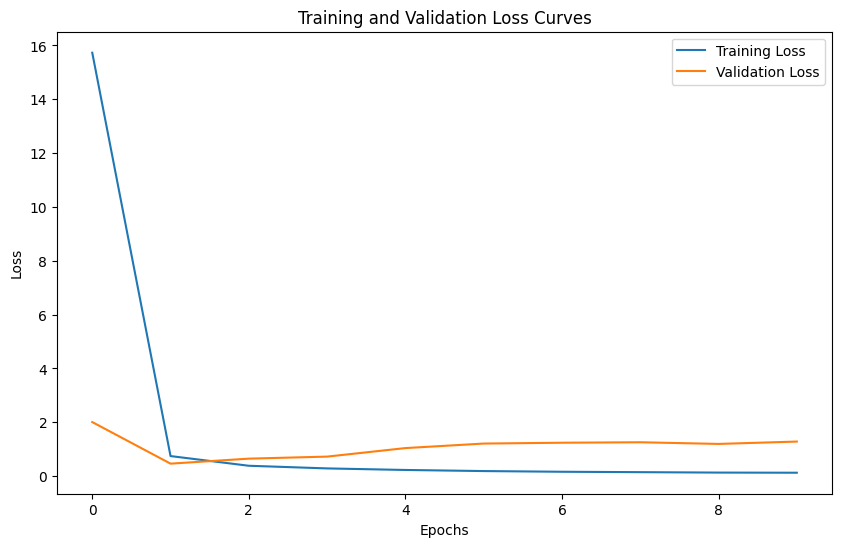

In [3]:
import segmentation_models_pytorch as smp
from autoencoder import Autoencoder
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt

segmenter = smp.Unet('timm-resnest101e', in_channels=1, classes=1)
segmenter.load_state_dict(torch.load('./models/Unet-timm-resnest101e-512x512-augmented-with-random-crops-normalized_epoch10.pth'))
autoencoder = Autoencoder(output_channels=1)
autoencoder.load_state_dict(torch.load('./models/autoencoder-single-channel-with-cropped-data.pth'))

config = {
    'model': 'DualModel_encoder_with_mse',
    'learning_rate': 0.001,
    'epochs': 10,
    'batch_size': trainloader_fundus.batch_size,
    'optimizer': 'Adam',
    'criterion': 'MSELoss, DiceLoss',
}

autoencoder = Autoencoder(output_channels=1)

criterion_hsi = nn.MSELoss()
criterion_fundus = smp.losses.DiceLoss(mode='binary')

optimizer_fundus = torch.optim.Adam(segmenter.parameters(), lr=config['learning_rate'])
optimizer_encoder = torch.optim.Adam(autoencoder.encoder.parameters(), lr=config['learning_rate'])

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

train_losses, val_losses = train_and_validate(encoder=autoencoder.encoder, 
                   segmenter=segmenter, 
                   trainloader_hsi=trainloader_hsi, 
                   trainloader_fundus=trainloader_fundus, 
                   validationloader_hsi=validationloader_hsi, 
                   validationloader_fundus=validationloader_fundus,
                   criterion_hsi=criterion_hsi,
                   criterion_fundus=criterion_fundus,
                   optimizer_encoder=optimizer_encoder,
                   optimizer_fundus=optimizer_fundus,
                   epochs=10,
                   model_name=config['model'],
                   device=device,
                   batch_print=1)

# Plotting the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()


/home/tim_ivan/idp/.venv/lib/python3.8/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


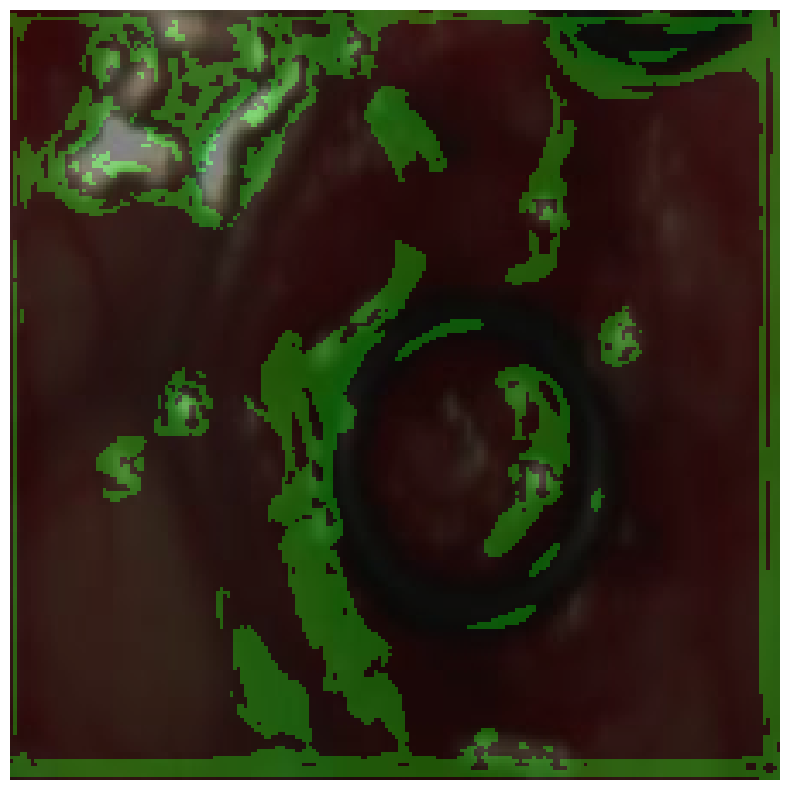

In [22]:
from HSI_Net import CombinedModel
from segmentation_util import predict, show_overlay
import cv2

# def show_overlay(model, data, device):
#     prediction = predict(model, data[0], device)
#     image = data[1].cpu().numpy().squeeze()
#     image = np.stack([image, image, image], axis=-1)
#     overlay = np.zeros_like(image)
#     overlay[prediction.cpu().numpy().squeeze(0) == 1] = [0, 255, 0]
#     combined = cv2.addWeighted(image, 0.7, overlay, 0.3, 0)
    
#     plt.figure(figsize=(10, 10))
#     plt.imshow(combined, cmap='gray')
#     plt.axis('off')  # Turn off axis numbers and ticks
#     plt.show()

segmenter = smp.Unet('timm-resnest101e', in_channels=1, classes=1)
segmenter.load_state_dict(torch.load('./models/DualModel_encoder_with_mse_segmenter.pth'))
autoencoder = Autoencoder(output_channels=1)
autoencoder.encoder.load_state_dict(torch.load('./models/DualModel_encoder_with_mse_encoder.pth'))

model = CombinedModel(autoencoder.encoder, segmenter)
show_overlay(model, trainset_hsi[22], device)